# Yield curve animation

Show the movement of EUR yield curve over time

In [2]:
# !pip install ipympl
from src.data import dataset
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import numpy as np
from datetime import timedelta

In [3]:
zerocurve = dataset.Zerocurve()
zerocurve.load_data()

2023-03-15 11:45:47.492 | INFO     | src.data.dataset:read_data:141 - reading zero curve data from ESW.


In [4]:
df = zerocurve.df
df.pivot(columns = 'tenor', values = 'rate')

tenor,1 Year,10 Years,15 Months,15 Years,18 Months,2 Years,3 Months,3 Years,30 Years,4 Years,5 Years,6 Months,7 Years,9 Months,ON
rate_dt,,,,,,,,,,,,,,,
2004-09-06,2.651565,5.217850,2.822715,5.367339,2.988139,3.298175,2.121240,3.825284,5.410036,4.232494,4.538927,2.298449,4.934807,2.476137,2.121240
2004-09-07,2.700174,5.193965,2.872345,5.346548,3.036262,3.338711,2.139612,3.844763,5.391362,4.233661,4.527671,2.332966,4.912476,2.520157,2.139612
2004-09-08,2.731688,5.195932,2.906993,5.343014,3.072722,3.375993,2.149441,3.877788,5.385502,4.259989,4.547567,2.352607,4.922632,2.546828,2.149441
2004-09-09,2.662770,5.158222,2.829146,5.324286,2.988434,3.284360,2.129304,3.784690,5.376611,4.173438,4.470124,2.311673,4.863580,2.489955,2.129304
2004-09-10,2.593700,5.136517,2.754329,5.302756,2.911134,3.208441,2.110625,3.722313,5.355005,4.125765,4.433397,2.268949,4.837977,2.431078,2.110625
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-02-22,2.937054,2.600728,2.774903,2.552547,2.642319,2.479086,2.978537,2.404607,2.084580,2.439608,2.487017,3.178055,2.558347,3.099154,2.978537
2023-02-23,2.918201,2.571125,2.731899,2.518990,2.586969,2.419994,3.049652,2.359113,2.050232,2.402910,2.454270,3.238725,2.528621,3.117648,3.049652
2023-02-24,3.087703,2.560305,2.924748,2.517924,2.780437,2.580853,3.045115,2.444523,2.115453,2.447321,2.477391,3.279834,2.529558,3.234152,3.045115


Currently we have an inverse yield curve. Which is quit unusual. 

TypeError: Line2D.set_data() got an unexpected keyword argument 'x'

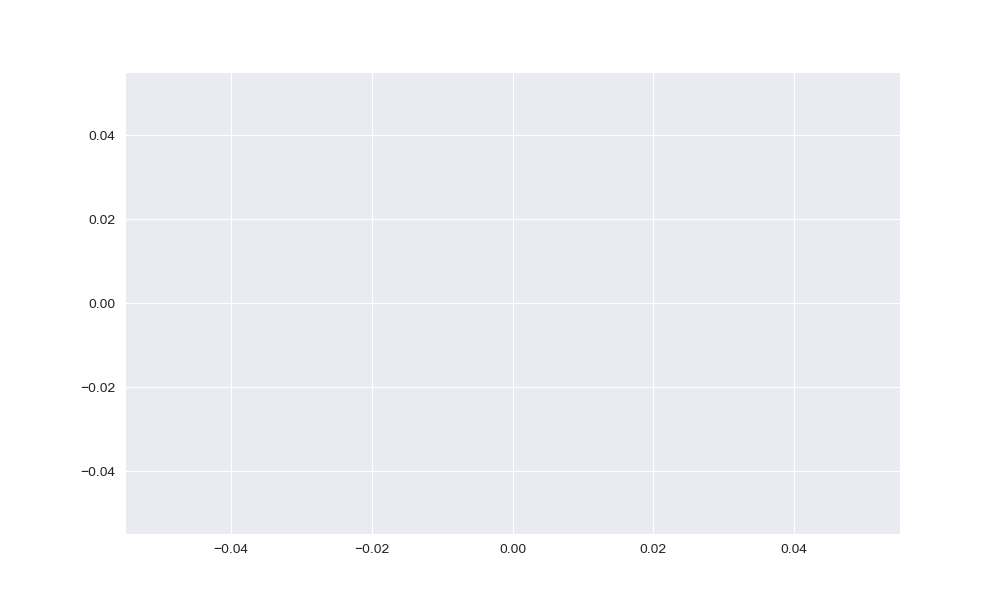

In [11]:
df['forward'] = df['value_dt'] - df.index
df['forward'] = df['forward'].dt.days
# df[df.index ==df.index[-1]].plot(x = 'value_dt',y = 'rate');

df[df.index==a[100]]
fig, ax = plt.subplots()
line, = ax.plot([])
line.set_data(x = 'forward', y = 'rate')    
                  

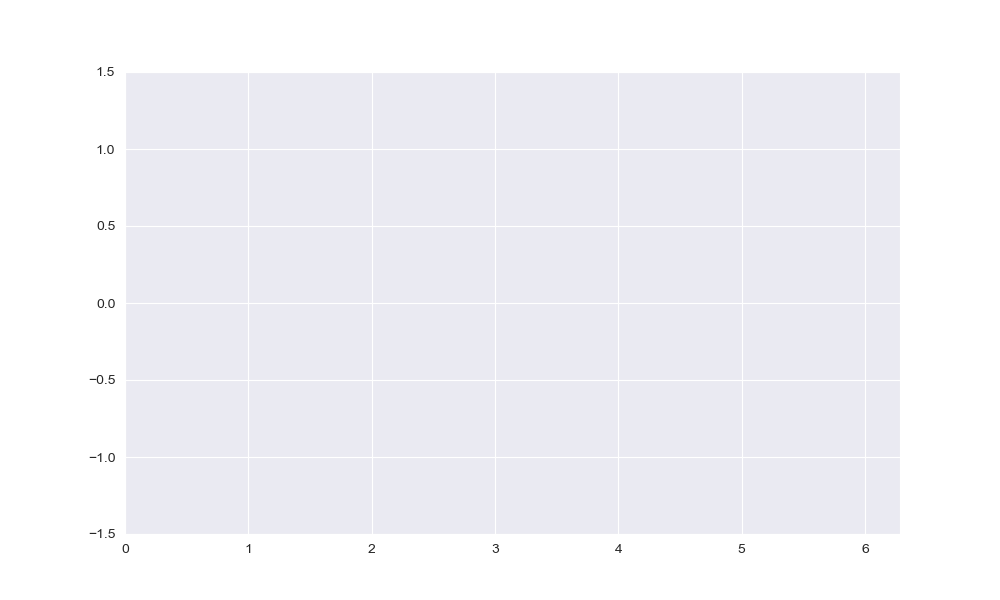

In [13]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import numpy as np

x = np.linspace(0, 2 * np.pi, 100)

# generate 10 curves
y = np.sin(x.reshape(-1, 1) + np.random.uniform(0, 2 * np.pi, (1, 10)))

fig, ax = plt.subplots()
ax.set(xlim=(0, 2 * np.pi), ylim=(-1.5, 1.5))
# lines = [ax.plot([], [], lw=2)[0] for _ in range(y.shape[1])]
lines = ax.plot(np.empty((0, y.shape[1])), np.empty((0, y.shape[1])), lw=2)

def animate(i):
    for line_k, y_k in zip(lines, y.T):
        line_k.set_data(x[:i], y_k[:i])
    return lines

anim = FuncAnimation(fig, animate, frames=x.size, interval=2, repeat=False)
plt.show()

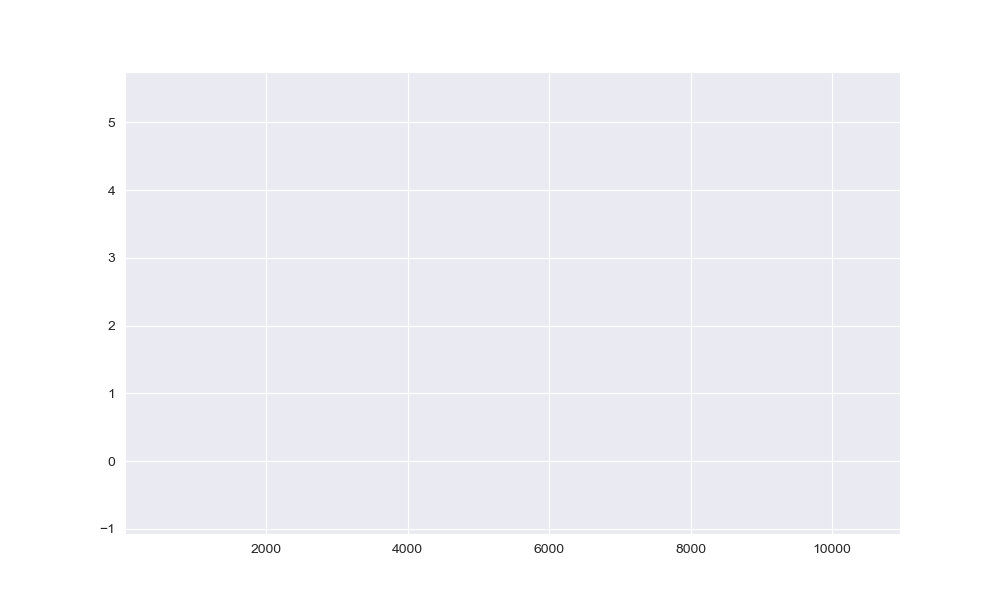

In [6]:
%matplotlib widget
fig, ax = plt.subplots()

line, = ax.plot([])
ax.set_xlim(df['forward'].min(),df['forward'].max())
ax.set_ylim(df['rate'].min(), df['rate'].max())
a = np.arange(df.index.min(), df.index.max(), timedelta(days = 1))

def animate(frame_num):    
    df[df.index==a[frame_num]]
    line.set_data((df['forward'], df['rate']))
    return line

anim = FuncAnimation(fig, animate, frames = a.size, interval = 5)
plt.show()

In [3]:
df = zerocurve.df
df_v = df[df['rate_dt']==df['rate_dt'].max()]
df_v


KeyError: 'rate_dt'